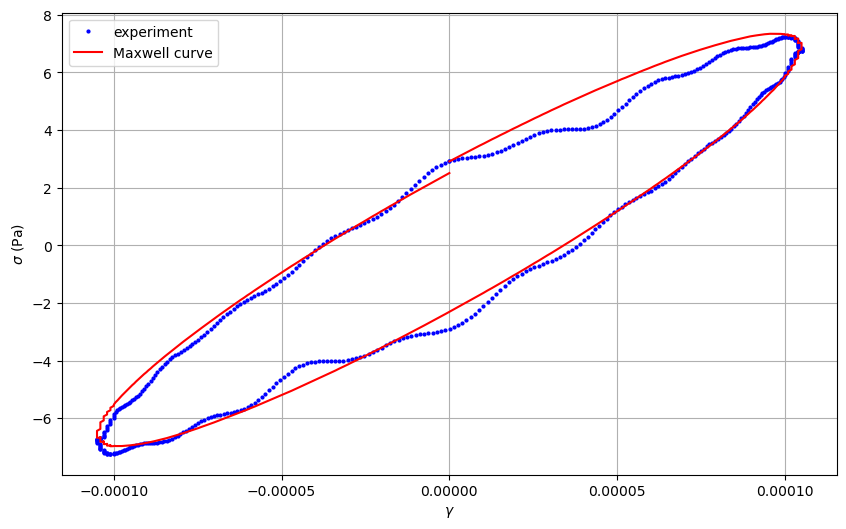

拟合参数结果：
弹性模量 E = 7.17e+04 Pa
粘度系数 η = 3.01e+01 Pa·s
特征时间 λ = 4.20e-04 s


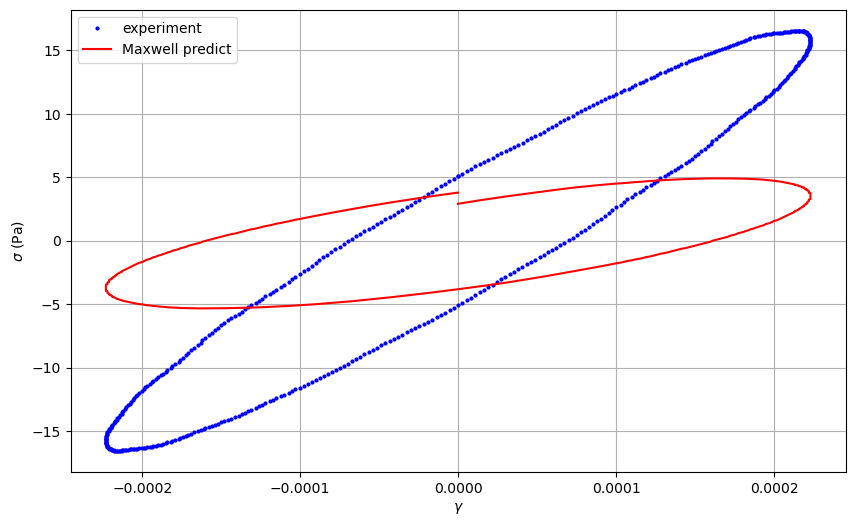


Sheet new数据:
时间范围: 0.0 至 189.5 秒
应变范围: -1.52e-07 至 -1.52e-07
实际应力范围: -16.548 至 16.548 Pa
预测应力范围: -5.332863180826062 至 4.9135170632230265 Pa


In [4]:
import pandas as pd

# 读取Excel文件中的第一个sheet
df = pd.read_excel('data/sx_real_data.xlsx', sheet_name=0)
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 提取所需列并转换为numpy数组
gamma = df['gamma'].values
sigma = df['sigma'].values 
time = df['Time'].values

# 定义Maxwell模型的微分方程
def maxwell_model(t, E, eta):
    """
    Maxwell模型的微分方程解
    E: 弹性模量
    eta: 粘度系数
    """
    gamma_dot = np.gradient(gamma, t) # 计算应变率
    sigma_pred = np.zeros_like(t)
    
    # 使用差分方法求解微分方程,并设置初始条件
    dt = t[1] - t[0]
    # 设置t=0时的边界条件
    sigma_pred[0] = 2.9097  # 初始应力值
    gamma_0 = 0.0105      # 初始应变值
    
    for i in range(1, len(t)):
        dsigma = (E * gamma_dot[i] - sigma_pred[i-1]/eta) * dt
        sigma_pred[i] = sigma_pred[i-1] + dsigma
        
    return sigma_pred

# 初始参数猜测
E_init = 0.1  # 初始弹性模量
eta_init = 0.1 # 初始粘度系数
p0 = [E_init, eta_init]

# 使用最小二乘法拟合
popt, pcov = curve_fit(maxwell_model, time, sigma, p0=p0)
E_fit, eta_fit = popt

# 计算拟合曲线
sigma_fit = maxwell_model(time, E_fit, eta_fit)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(gamma, sigma, 'bo', label='experiment', markersize=2)
plt.plot(gamma, sigma_fit, 'r-', label='Maxwell curve')
plt.xlabel('$\gamma$')
plt.ylabel('$\sigma$ (Pa)')
plt.legend()
plt.grid(True)
plt.show()

# 打印拟合参数
print(f'拟合参数结果：')
print(f'弹性模量 E = {E_fit:.2e} Pa')
print(f'粘度系数 η = {eta_fit:.2e} Pa·s')
print(f'特征时间 λ = {eta_fit/E_fit:.2e} s')



# 读取sheet_name=new的数据
data_new = pd.read_excel('data/sx_real_data.xlsx', sheet_name=2)
time_new = data_new['Time'].values
gamma_new = data_new['gamma'].values 
sigma_new = data_new['sigma'].values

# 使用已拟合的Maxwell模型预测应力
sigma_pred_new = maxwell_model(time_new, E_fit, eta_fit)

# 绘制对比图
plt.figure(figsize=(10, 6))
plt.plot(gamma_new, sigma_new, 'bo', label='experiment', markersize=2)
plt.plot(gamma_new, sigma_pred_new, 'r-', label='Maxwell predict')
plt.xlabel('$\gamma$')
plt.ylabel('$\sigma$ (Pa)')
plt.legend()
plt.grid(True)
plt.show()

# 输出数据
print("\nSheet new数据:")
print("时间范围:", time_new[0], "至", time_new[-1], "秒")
print("应变范围:", gamma_new[0], "至", gamma_new[-1])
print("实际应力范围:", min(sigma_new), "至", max(sigma_new), "Pa")
print("预测应力范围:", min(sigma_pred_new), "至", max(sigma_pred_new), "Pa")


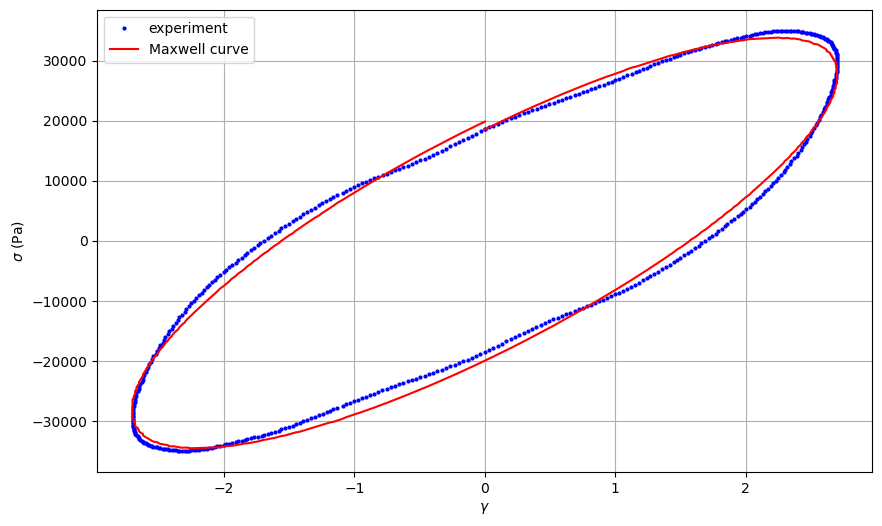

拟合参数结果：
弹性模量 E = 1.55e+04 Pa
粘度系数 η = 3.76e+02 Pa·s
特征时间 λ = 2.44e-02 s


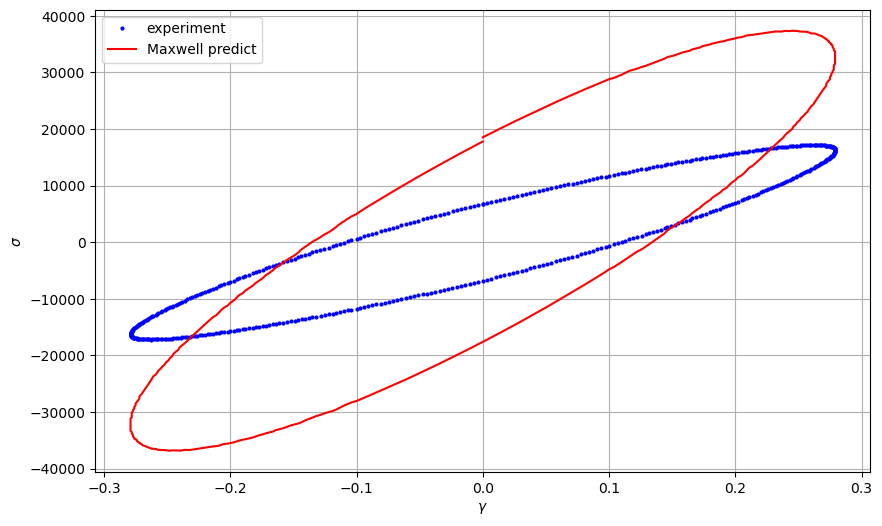


Sheet new数据:
时间范围: 0.0 至 1276.0 秒
应变范围: -1.06e-05 至 -1.06e-05
实际应力范围: -17178.0 至 17178.0 Pa
预测应力范围: -36821.22495753839 至 37357.65467136442 Pa


In [5]:

import pandas as pd

# 读取Excel文件中的第一个sheet
df = pd.read_excel('data/sx_real_data.xlsx', sheet_name=26)
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 提取所需列并转换为numpy数组
gamma = df['gamma'].values
sigma = df['sigma'].values 
time = df['Time'].values

# 定义Maxwell模型的微分方程
def maxwell_model(t, E, eta):
    """
    Maxwell模型的微分方程解
    E: 弹性模量
    eta: 粘度系数
    """
    gamma_dot = np.gradient(gamma, t) # 计算应变率
    sigma_pred = np.zeros_like(t)
    
    # 使用差分方法求解微分方程
    dt = t[1] - t[0]
    sigma_pred[0] = E * gamma[0]

    sigma_pred[0] = 18526  # 初始应力值
    for i in range(1, len(t)):
        dsigma = (E * gamma_dot[i] - sigma_pred[i-1]/eta) * dt
        sigma_pred[i] = sigma_pred[i-1] + dsigma
        
    return sigma_pred

# 初始参数猜测
E_init = 10  # 初始弹性模量
eta_init = 9 # 初始粘度系数
p0 = [E_init, eta_init]

# 使用最小二乘法拟合
popt, pcov = curve_fit(maxwell_model, time, sigma, p0=p0)
E_fit, eta_fit = popt

# 计算拟合曲线
sigma_fit = maxwell_model(time, E_fit, eta_fit)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(gamma, sigma, 'bo', label='experiment', markersize=2)
plt.plot(gamma, sigma_fit, 'r-', label='Maxwell curve')
plt.xlabel('$\gamma$')
plt.ylabel('$\sigma$ (Pa)')
plt.legend()
plt.grid(True)
plt.show()

# 打印拟合参数
print(f'拟合参数结果：')
print(f'弹性模量 E = {E_fit:.2e} Pa')
print(f'粘度系数 η = {eta_fit:.2e} Pa·s')
print(f'特征时间 λ = {eta_fit/E_fit:.2e} s')


# 读取sheet_name=new的数据
data_new = pd.read_excel('data/sx_real_data.xlsx', sheet_name=20)
time_new = data_new['Time'].values
gamma_new = data_new['gamma'].values 
sigma_new = data_new['sigma'].values

# 使用已拟合的Maxwell模型预测应力
sigma_pred_new = maxwell_model(time_new, E_fit, eta_fit)

# 绘制对比图
plt.figure(figsize=(10, 6))
plt.plot(gamma_new, sigma_new, 'bo', label='experiment', markersize=2)
plt.plot(gamma_new, sigma_pred_new, 'r-', label='Maxwell predict')
plt.xlabel('$\gamma$')
plt.ylabel('$\sigma$')
# plt.title('Sheet 26 数据的Maxwell模型预测对比')
plt.legend()
plt.grid(True)
plt.show()

# 输出数据
print("\nSheet new数据:")
print("时间范围:", time_new[0], "至", time_new[-1], "秒")
print("应变范围:", gamma_new[0], "至", gamma_new[-1])
print("实际应力范围:", min(sigma_new), "至", max(sigma_new), "Pa")
print("预测应力范围:", min(sigma_pred_new), "至", max(sigma_pred_new), "Pa")


